## Final Project Submission

Please fill out:
* Student name: Sumedh Bhardwaj
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: David Elliot
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [46]:
#import libraries
import itertools
import numpy as np
import pandas as pd 
from sklearn.dummy import DummyRegressor
from scipy import stats
from scipy.stats import pearsonr
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#make a dataframe
kc = pd.read_csv('data/kc_house_data.csv')
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
kc.info()
#sqft_basement should be int not object, remove NaN from waterfront, make no/yes binary (1,0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#check dataframe math functions
#avg of 3br, 2ba, 2080 sqft, 1.5 floor, 1970 avg yr built, $540k is avg price (min=78k, max=7.7 million)
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#remove irrelevant columns according to canvas
to_drop = ['date', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id']
kc.drop(to_drop, axis=1, inplace=True)

In [12]:
#df.dropna(inplace=True)

In [13]:
#check to see if they dropped
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   view         21534 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [14]:
#see column names
kc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [16]:
#check for null values, shows waterfront & view have some, so check sum of null
kc.isna().any()

price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
floors         False
waterfront      True
view            True
condition      False
grade          False
yr_built       False
zipcode        False
dtype: bool

In [15]:
#waterfront null values are significant bc they account for almost 10% of dataset so cant justd drop it
kc.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
view             63
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [16]:
print(kc.waterfront.unique())
kc.waterfront.value_counts()

[nan 'NO' 'YES']


NO     19075
YES      146
Name: waterfront, dtype: int64

In [17]:
#bc yes is less than 1%, making nan values false won't change it up
kc.waterfront = kc.waterfront.fillna(value=False)

In [18]:
#change to boolean (true& false)
kc.waterfront = kc.waterfront.astype("bool") 

In [19]:
#almost all the data is none(0) so can probably drop this column
kc.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
to_drop = ['view']
kc.drop(to_drop, axis=1, inplace=True)

In [21]:
#make sure view column is gone
kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,221900.0,3,1.00,1180,5650,1.0,False,Average,7 Average,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,True,Average,7 Average,1951,98125
2,180000.0,2,1.00,770,10000,1.0,True,Average,6 Low Average,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,True,Very Good,7 Average,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,True,Average,8 Good,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,True,Average,8 Good,2009,98103
21593,400000.0,4,2.50,2310,5813,2.0,True,Average,8 Good,2014,98146
21594,402101.0,2,0.75,1020,1350,2.0,True,Average,7 Average,2009,98144
21595,400000.0,3,2.50,1600,2388,2.0,False,Average,8 Good,2004,98027


In [22]:
kc.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [23]:
#no null values left
kc.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [24]:
#gotta convert waterfront, condition, grade to float/int
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  bool   
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: bool(1), float64(3), int64(5), object(2)
memory usage: 1.7+ MB


In [25]:
#convert boolean to integer so I can calculate
kc.replace({False: 0, True: 1}, inplace=True)

In [26]:
#strip string from grade leaving just numbers
kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,1,Average,7 Average,1951,98125
2,180000.0,2,1.00,770,10000,1.0,1,Average,6 Low Average,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,1,Very Good,7 Average,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,1,Average,8 Good,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1,Average,8 Good,2009,98103
21593,400000.0,4,2.50,2310,5813,2.0,1,Average,8 Good,2014,98146
21594,402101.0,2,0.75,1020,1350,2.0,1,Average,7 Average,2009,98144
21595,400000.0,3,2.50,1600,2388,2.0,0,Average,8 Good,2004,98027


In [27]:
#remove grade strings, leaving number
kc['grade'] = kc['grade'].str.replace(r'\D', '').astype(int)

In [28]:
#convert grade to int from object but first have to convert to string first
kc['grade'].astype(str).astype(int)

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

In [29]:
#need to make avg=3,good=4,poor=1,verygood=5,fair=2
#prolly just drop it
kc.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [30]:
to_drop = ['condition']
kc.drop(to_drop, axis=1, inplace=True)

In [139]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.889985,7.657915,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.312916,1.173200,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1.000000,7.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1.000000,7.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1.000000,8.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,2015.000000,98199.000000


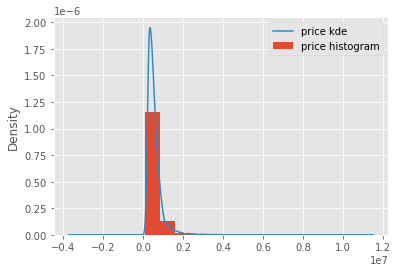

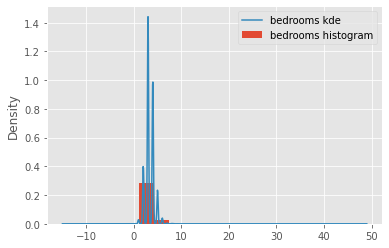

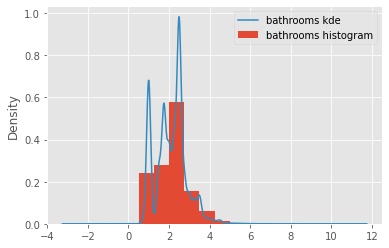

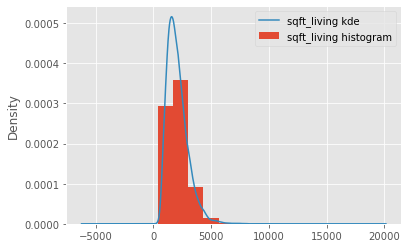

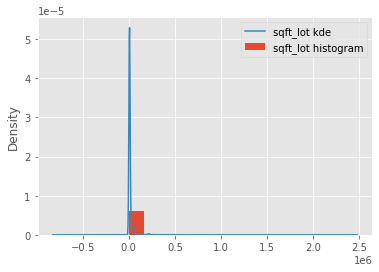

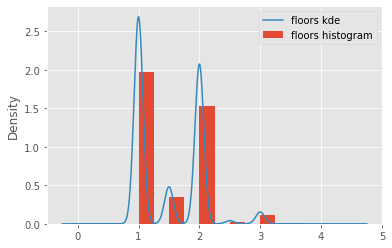

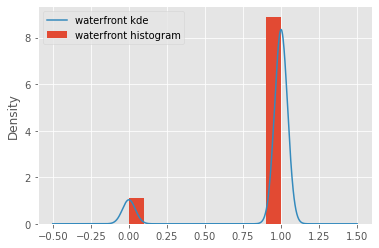

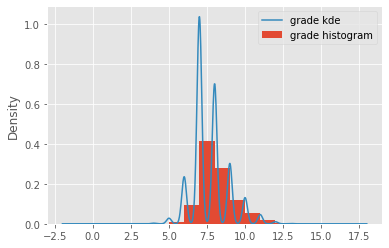

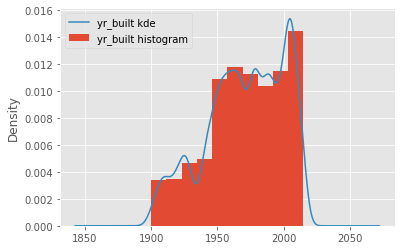

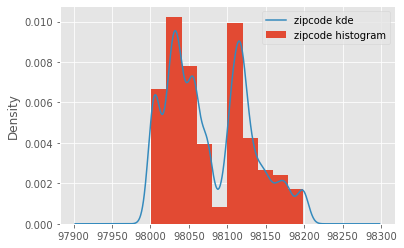

In [141]:
# For all the variables, check distribution by creating a histogram with kde
for column in kc:
    kc[column].plot.hist(density=True, label = column+' histogram')
    kc[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [32]:
#check correlations, create heatmap
kccorr=kc.corr()
kccorr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,zipcode
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.010400,0.667951,0.053953,-0.053402
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.004429,0.356563,0.155670,-0.154092
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.004609,0.665838,0.507173,-0.204786
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.006503,0.762779,0.318152,-0.199802
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.001762,0.114731,0.052946,-0.129586
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.004928,0.458794,0.489193,-0.059541
waterfront,0.010400,0.004429,0.004609,0.006503,-0.001762,0.004928,1.000000,0.007594,0.003885,-0.011452
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.007594,1.000000,0.447865,-0.185771
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.003885,0.447865,1.000000,-0.347210
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.011452,-0.185771,-0.347210,1.000000


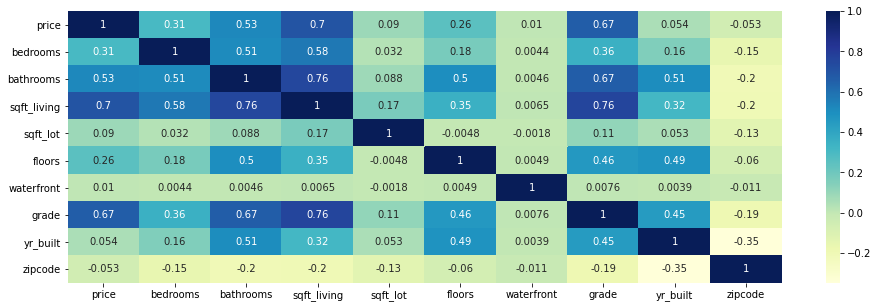

In [33]:
plt.figure(figsize = (16,5))
sns.heatmap(kccorr, xticklabels=kccorr.columns, yticklabels=kccorr.columns, annot=True, cmap="YlGnBu");


<Figure size 1152x360 with 0 Axes>

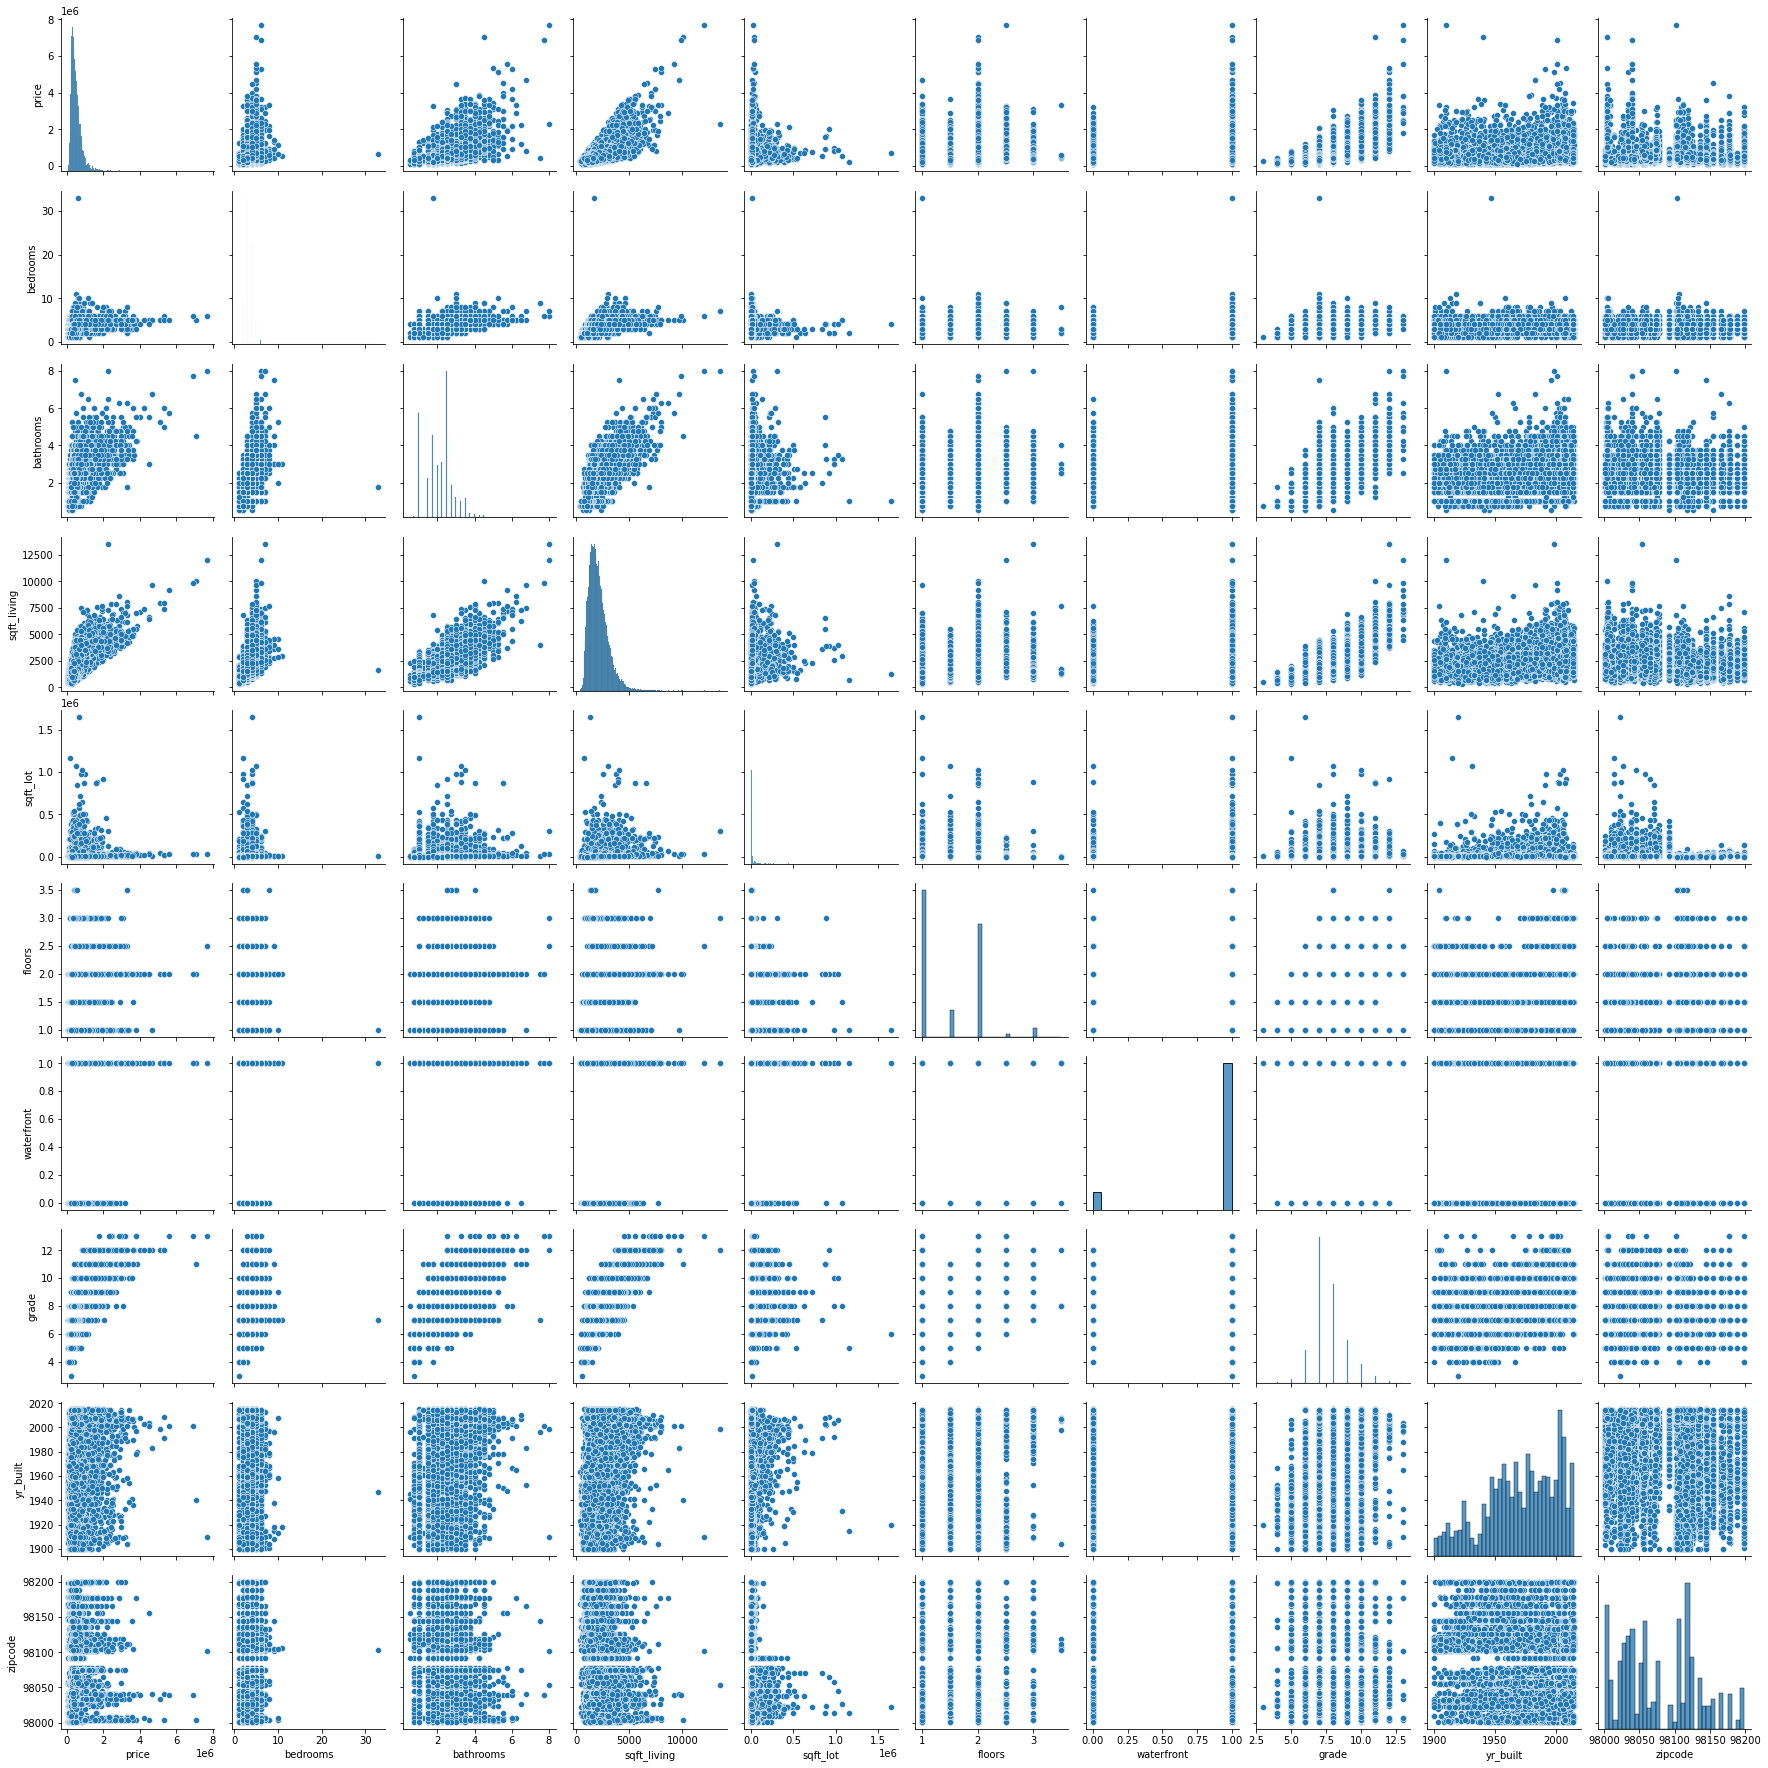

In [40]:
plt.figure(figsize=(16,5))
sns.pairplot(kc)
plt.show();

Check for distribution outliers/errors

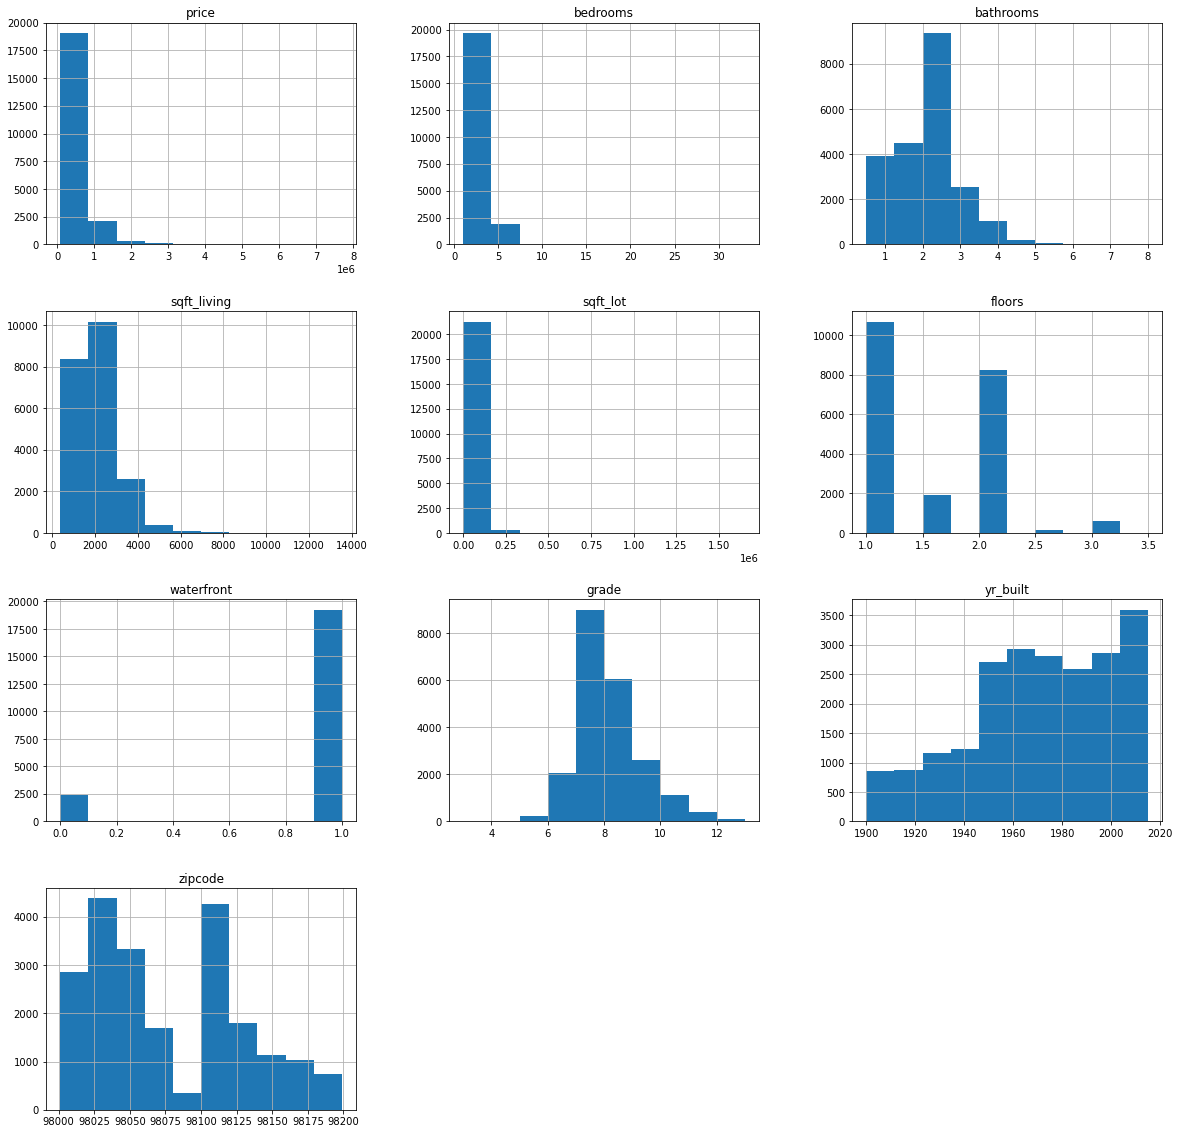

In [41]:
kc.hist(figsize=(20,20));


Look for liniarity & Homoskedasticity

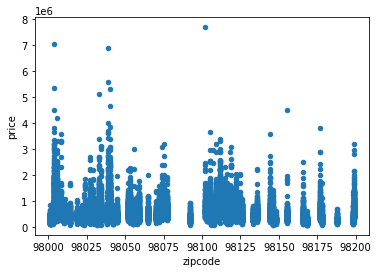

In [36]:
kc.plot.scatter(y='price', x='zipcode');

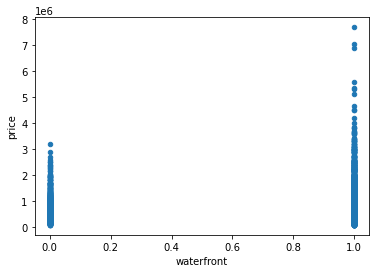

In [37]:
kc.plot.scatter(y='price', x='waterfront');

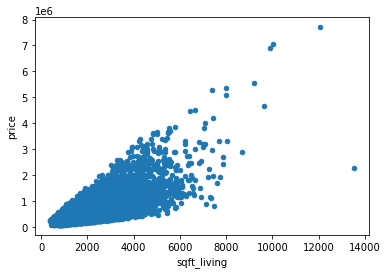

In [38]:
kc.plot.scatter(y='price', x='sqft_living');

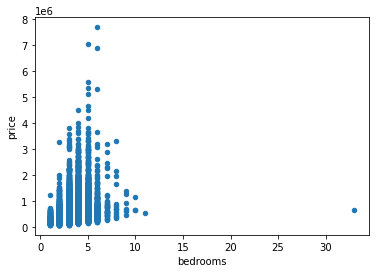

In [39]:
kc.plot.scatter(y='price', x='bedrooms');

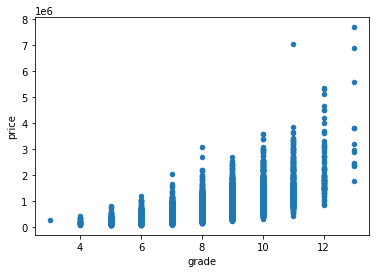

In [40]:
kc.plot.scatter(y='price', x='grade');

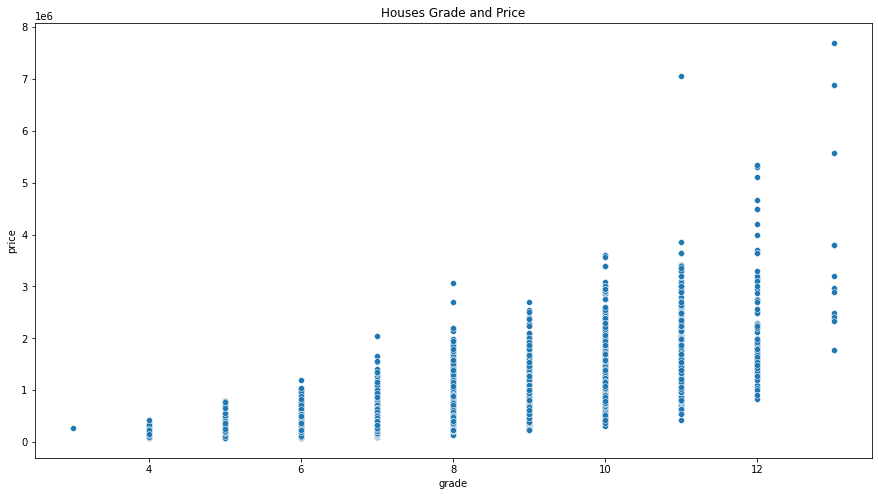

In [87]:
#one hot encoding to see categorical variable grade
plt.figure(figsize=(15,8))
sns.scatterplot(kc['grade'],kc['price'])
plt.title('Houses Grade and Price', fontsize=12);

Baseline Model

In [44]:
y = kc["price"]
X = kc.drop("price", axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_test, y_test)

DummyRegressor()

In [55]:
dummy_regr.predict(X_test)


array([537333.45814815, 537333.45814815, 537333.45814815, ...,
       537333.45814815, 537333.45814815, 537333.45814815])

In [56]:
dummy_regr.score(X_test, y_test)


0.0

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6216014874994493

In [58]:
model.predict(X_test)

array([ 138669.05609034,  294752.77289612,  307788.60221503, ...,
       1196142.59928253, 1724635.37276493,  214769.26471853])

In [59]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,zipcode
6405,3,2.50,1880,4499,2.0,1,8,1993,98029
937,3,2.50,2020,6564,1.0,1,7,1994,98042
19076,5,4.00,4720,493534,2.0,1,9,1975,98027
15201,2,2.00,1430,3880,1.0,1,7,1949,98117
13083,3,2.25,2270,32112,1.0,1,8,1980,98042
...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,1,7,2004,98065
21575,4,2.75,2770,3852,2.0,1,8,2014,98178
5390,4,1.50,1530,9000,1.0,1,6,1976,98014
860,1,0.75,380,15000,1.0,1,5,1963,98168


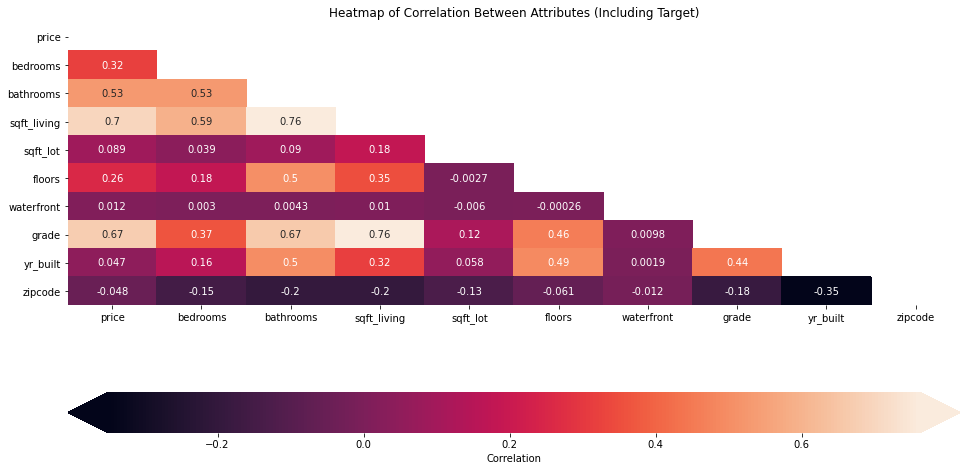

In [88]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()


fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(
    data=corr,   
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)


ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [89]:
most_correlated_feature = "sqft_living"

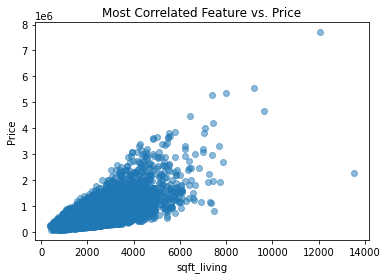

In [94]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

# Model

Model 1

In [184]:
#formulas for each ols models
f = 'price ~ grade'
f2 = 'price ~ sqft_living + C(grade)'
f3 =  'price ~ sqft_living + C(grade) + bedrooms + C(waterfront)'

In [150]:
#this was the best one of low conditional value
Model_1 = smf.ols(formula=f, data=kc).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:31:54   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

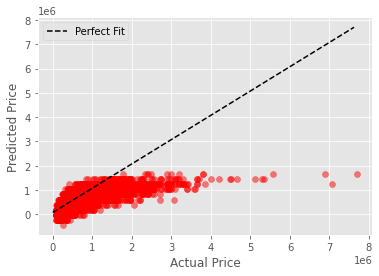

In [182]:
#check for linearity
x_cols = ['grade']
preds = Model_1.predict(kc[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(kc.price.min(), kc.price.max())
ax.plot(perfect_line, linestyle="--", color="black", label="Perfect Fit")
ax.scatter(kc.price, preds, alpha=0.5, color="red")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

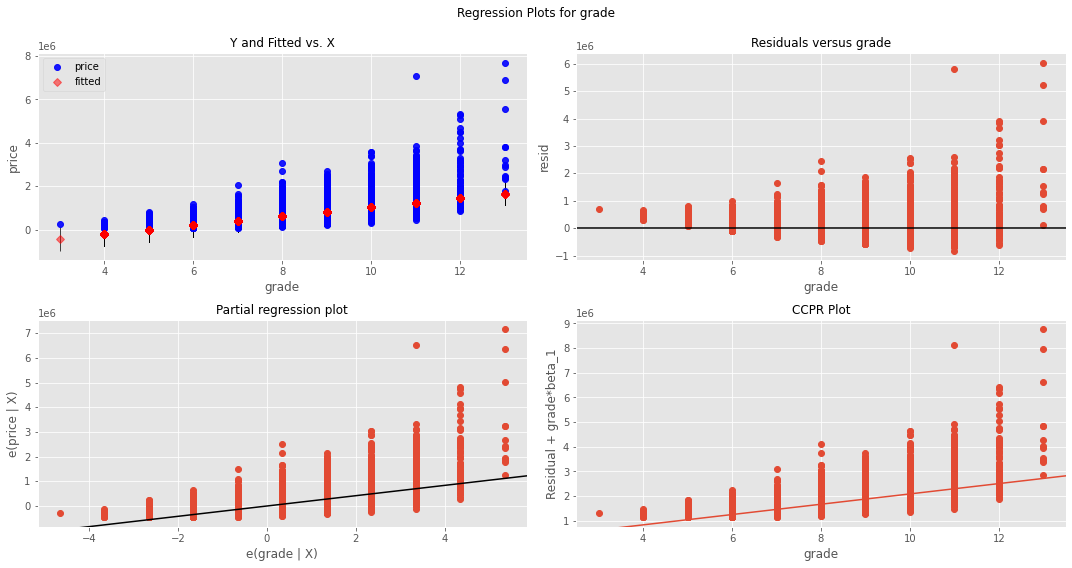

In [153]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model_1, "grade", fig=fig)
plt.show()

Model 2

In [197]:
#still high conditional number which leads to multicollinearity 
Model_2 = smf.ols(formula=f2, data=kc).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:17:16   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21585   BIC:                         5.961e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.802e+05   2.38e+05      0.758      0.448   -2.86e+05    6.46e+05
C(grade)[T.4]  -7.527e+04   2.42e+05     -0.311      0.756    -5.5e+05    3.99e+05
C(grade)[T.5]  -8.633e+04   2.38e+05     -0.363      0.717   -5.53e+05     3.8e+05
C(grade)[T.6]  -6.569e+04   2.38e+05     -0.276      0.782   -5.32e+05       4e+05
C(grade)[T.7]  -4.331e+04   2.38e+05     -0.182      0.855   -5.09e+05    4.23e+05
C(grade)[T.8]    1.92e+04   2.38e+05      0.081      0.936   -4.47e+05    4.85e+05
C(grade)[T.9]   1.425e+05   2.38e+05      0.599      0.549   -3.24e+05    6.09e+05
C(grade)[T.10]  3.386e+05   2.38e+05      1.423      0.155   -1.28e+05    8.05e+05
C(grade)[T.11]  6.264e+05   2.38e+05      2.630      0.009     1.6e+05    1.09e+06
C(grade)[T.12]  1.161e+06   2.39e+05      4.849      0.000    6.92e+05    1.63e+06
C(grade)[T.13]  2.354e+06   2.47e+05      9.516      0.000    1.87e+06    2.84e+06
sqft_living      157.2485      2.783     56.501      0.000     151.793     162.704
==============================================================================
Omnibus:                    13860.549   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473194.517
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.346   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

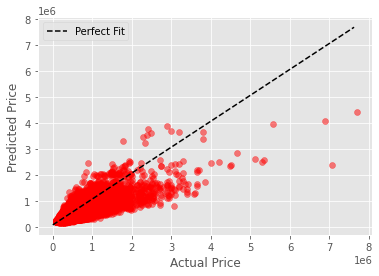

In [200]:
#check for linearity
x_cols = ['sqft_living', 'grade']
preds = Model_2.predict(kc[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(kc.price.min(), kc.price.max())
ax.plot(perfect_line, linestyle="--", color="black", label="Perfect Fit")
ax.scatter(kc.price, preds, alpha=0.5, color="red" )
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Model 3

In [198]:
#also too high of a conditional number which leads to multicollinearity 
#will have to stick to first model
Model_3 = smf.ols(formula=f3, data=kc).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2524.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:17:23   Log-Likelihood:            -2.9792e+05
No. Observations:               21597   AIC:                         5.959e+05
Df Residuals:                   21584   BIC:                         5.960e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.938e+05   2.37e+05      0.818      0.414   -2.71e+05    6.58e+05
C(grade)[T.4]  -6.454e+04   2.41e+05     -0.267      0.789   -5.38e+05    4.09e+05
C(grade)[T.5]  -6.277e+04   2.38e+05     -0.264      0.792   -5.28e+05    4.03e+05
C(grade)[T.6]  -3.906e+04   2.37e+05     -0.165      0.869   -5.04e+05    4.26e+05
C(grade)[T.7]  -1.258e+04   2.37e+05     -0.053      0.958   -4.77e+05    4.52e+05
C(grade)[T.8]   4.604e+04   2.37e+05      0.194      0.846   -4.19e+05    5.11e+05
C(grade)[T.9]   1.636e+05   2.37e+05      0.690      0.490   -3.01e+05    6.28e+05
C(grade)[T.10]  3.508e+05   2.37e+05      1.478      0.139   -1.14e+05    8.16e+05
C(grade)[T.11]  6.285e+05   2.38e+05      2.645      0.008    1.63e+05    1.09e+06
C(grade)[T.12]  1.146e+06   2.39e+05      4.798      0.000    6.78e+05    1.61e+06
C(grade)[T.13]  2.315e+06   2.47e+05      9.383      0.000    1.83e+06     2.8e+06
sqft_living      175.5095      3.286     53.409      0.000     169.068     181.951
bedrooms       -2.307e+04   2220.781    -10.386      0.000   -2.74e+04   -1.87e+04
==============================================================================
Omnibus:                    13669.586   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445920.398
Skew:                           2.537   Prob(JB):                         0.00
Kurtosis:                      24.674   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

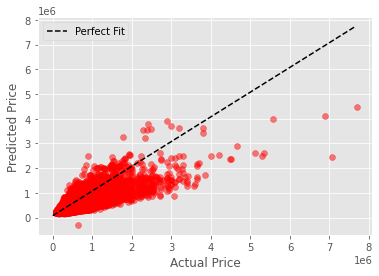

In [199]:
#check for linearity
x_cols = ['sqft_living', 'grade', 'bedrooms', 'waterfront']
preds = Model_3.predict(kc[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(kc.price.min(), kc.price.max())
ax.plot(perfect_line, linestyle="--", color="black", label="Perfect Fit")
ax.scatter(kc.price, preds, alpha=0.5, color="red")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

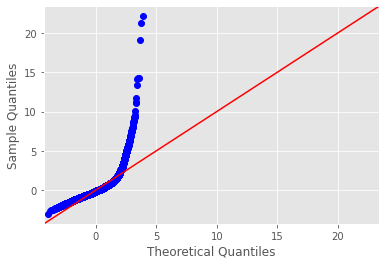

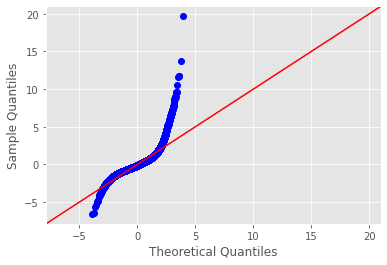

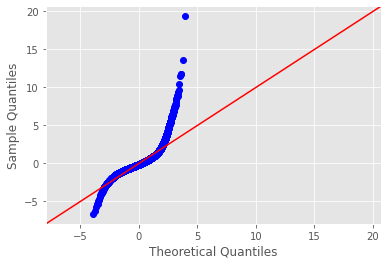

In [201]:
#Check for normality
#model 1 is not normal, model 2 & 3 are better but still not normal
plt.style.use('ggplot')

f = 'price ~ grade'
f2 = 'price ~ sqft_living + C(grade)'
f3 =  'price ~ sqft_living + C(grade) + bedrooms'
Model_1 = smf.ols(formula=f, data=kc).fit()
Model_2 = smf.ols(formula=f2, data=kc).fit()
Model_3 = smf.ols(formula=f3, data=kc).fit()
resid1 = Model_1.resid
resid2 = Model_2.resid
resid3 = Model_3.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

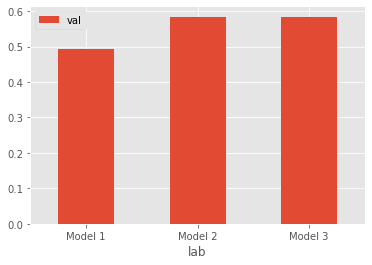

In [122]:
df = pd.DataFrame({'lab':['Model 1', 'Model 2', 'Model 3'], 'val':[0.493, 0.582,0.584]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [191]:
Model_3.pvalues

Intercept         2.809664e-01
C(grade)[T.4]     7.456150e-01
C(grade)[T.5]     7.702129e-01
C(grade)[T.6]     8.922435e-01
C(grade)[T.7]     9.280299e-01
C(grade)[T.8]     6.200720e-01
C(grade)[T.9]     2.271560e-01
C(grade)[T.10]    4.829073e-02
C(grade)[T.11]    7.089250e-03
C(grade)[T.12]    1.160106e-04
C(grade)[T.13]    2.645440e-04
sqft_living       0.000000e+00
bedrooms          3.189011e-11
dtype: float64

In [192]:
#make a train test
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [193]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [194]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 50781152202.61539
Test Mean Squarred Error: 54502719497.81872


In [125]:
my_sample = kc.sample(1)
my_sample_price = my_sample.iloc[0, 0]
my_sample_pt = my_sample.drop('price', axis=1)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt

Price of sample: $569995.0


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,zipcode
20153,4,2.5,2650,6875,2.0,1,8,2014,98059


In [157]:
def train_lr_randomly(data, sample_pt=None, ntimes=150):
    '''
    Takes in features & targets from `data` to train a linear regression with a
    random sample `ntimes`. It then returns a list of R2 scores, RMSEs, and the 
    predictions from a provided data point of features `sample_pt`.
    '''
    # To save all of our predictions
    r2 = []
    rmse = []
    # Only return predictions if there is something to predict (sample_pt given)
    point_preds = [] if (sample_pt is not None) else None

    # We'll repeat this little experiment to see how the model does
    for i in range(ntimes):
        # Creating a random sample of data to train on
        df_sample = data.sample(6000, replace=True)
        y = df_sample.price
        X = df_sample.drop('price', axis=1)

        # Our linear regression model about to be trained
        lr = LinearRegression()
        lr.fit(X, y)

        # Making predictions & evaluating on the data we used to train the model
        y_hat = lr.predict(X)
        rmse.append(np.sqrt(mean_squared_error(y, y_hat)))
        r2.append(lr.score(X, y))

        # Making a prediction on the one point the model definitely never saw
        if sample_pt is not None:
            y_hat_pt = lr.predict(sample_pt)
            # Getting just the single point to add into list
            point_preds.append(y_hat_pt[0])
    
    return r2, rmse, point_preds

In [158]:
r2_simple, rmse_simple, pt_preds_simple = train_lr_randomly(data=kc, sample_pt=my_sample_pt, ntimes=150)   

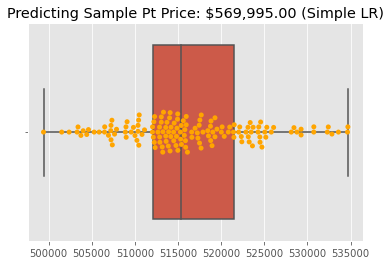

In [159]:
ax = sns.boxplot(x=pt_preds_simple);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

# Conclusions


First model was the best model